In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '/home/johanna/ICB/annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [3]:
n_rounds = 1
data = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None)
data.columns = ['seq'] + [i for i in range(n_rounds+1)]
# data = data.sample(n=1000)
# data.index = range(len(data))
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)
train_test = tdata.DataLoader(dataset=dataset, batch_size=1, shuffle=False)

In [4]:
model = mb.models.DinucSelex(use_dinuc=False, kernels=[0, 14, 12], n_rounds=1, n_batches=1).to(device)
l2 = []
optimiser = topti.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
# optimiser = topti.LBFGS(model.parameters())
criterion = mb.tl.PoissonLoss()

R^2: -229.0169721281302


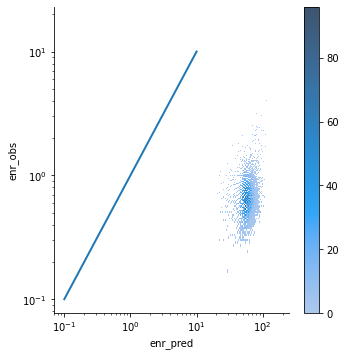

In [42]:
mb.pl.kmer_enrichment(model, train, k=8)

In [43]:
mb.tl.train_network(model, train, device, optimiser, criterion, num_epochs=500, early_stopping=10, log_each=10)

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 1.2572 , best epoch: -1 secs per epoch: 4.973 s
Epoch: 11, Loss: 0.8417 , best epoch: 9 secs per epoch: 5.419 s
Epoch: 21, Loss: 0.8302 , best epoch: 19 secs per epoch: 5.109 s
Epoch: 31, Loss: 0.8279 , best epoch: 29 secs per epoch: 5.068 s
Epoch: 41, Loss: 0.8278 , best epoch: 39 secs per epoch: 5.021 s
Epoch: 51, Loss: 0.8278 , best epoch: 49 secs per epoch: 5.027 s
Epoch: 61, Loss: 0.8278 , best epoch: 58 secs per epoch: 5.003 s
Epoch: 71, Loss: 0.8277 , best epoch: 68 secs per epoch: 4.979 s
Epoch: 81, Loss: 0.8276 , best epoch: 77 secs per epoch: 4.955 s
Epoch: 88, Loss: 0.8276 , best epoch: 77 secs per epoch: 4.964 s
early stop!


R^2: 0.30738393996354996


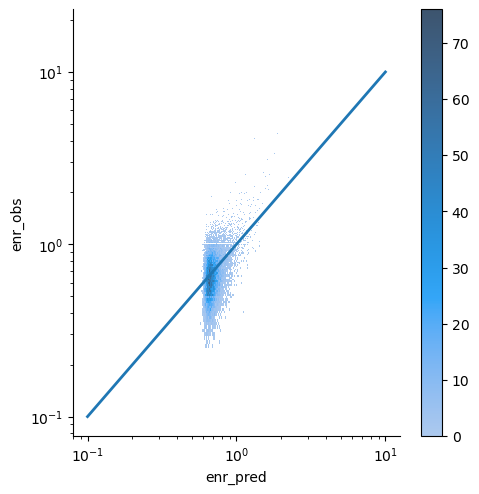

In [44]:
mb.pl.kmer_enrichment(model, train, k=8)

log_etas
Parameter containing:
tensor([[ 0.9747, -0.9747]], requires_grad=True)
activities
[[[1.0000007  0.5418115 ]
  [0.9999901  0.39498684]
  [0.9999899  0.5517411 ]]]


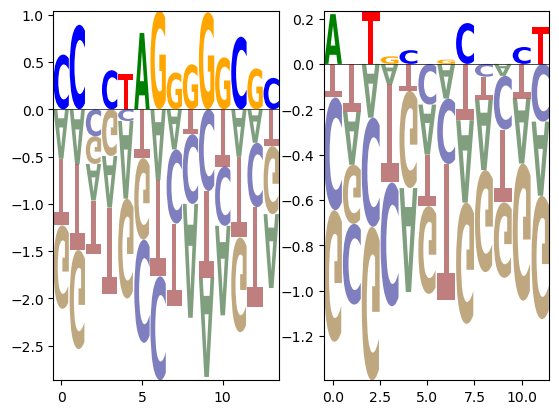

In [45]:
mb.pl.conv_mono(model)